In [9]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split  # para separar "training data" y "test data" fácil
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt  # para gráficos
import pandas as pd  # para administrar el dataframe

In [19]:
df = pd.read_csv("files/verbal_autopsies_clean.csv")
df = df.sample(frac=1)  # orden aleatorio
df = df.dropna(subset=["open_response", "gs_text34"])  # eliminar los valores nulos de open_response y gs_text34
print(len(df))
df.head(5)

9297


,newid,module,site,gs_text34,sex,age_years,age_months,age_days,open_response
8454,1331,Neonate,Pemba,Birth asphyxia,1.0,NaN,NaN,0.0,respond explain babi came last breath never cr...
6401,453,Child,AP,Pneumonia,2.0,NaN,9.0,NaN,month patient born pneumonia start sick one lu...
1125,1470,Adult,Bohol,Breast Cancer,2.0,70.0,NaN,NaN,cancer breast undergo oper hospit wherein righ...
5079,6572,Adult,AP,Other Cardiovascular Diseases,2.0,27.0,NaN,NaN,patient get pain chest took check doctor presc...
7543,1992,Child,Dar,Pneumonia,1.0,3.0,NaN,NaN,particip claim harsh behavior display medic of...


In [20]:
len(df["open_response"]) - df["open_response"].count()

0

In [28]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["open_response"])

In [29]:
print(X.shape) # tenemos 9297 filas y un vocabulario de 9002
# habrá que hacer 9002 entradas en la matriz

(9297, 9002)


In [35]:
y = df["gs_text34"]
y.head(5)

8454                   Birth asphyxia
6401                        Pneumonia
1125                    Breast Cancer
5079    Other Cardiovascular Diseases
7543                        Pneumonia
Name: gs_text34, dtype: object

In [38]:
class_values = y.unique()
print(f"Hay {len(class_values)} clases y sus valores son:\n {class_values}")

Hay 48 clases y sus valores son:
 ['Birth asphyxia' 'Pneumonia' 'Breast Cancer'
 'Other Cardiovascular Diseases' 'Stillbirth' 'Renal Failure'
 'Other Defined Causes of Child Deaths' 'Sepsis' 'Fires'
 'Bite of Venomous Animal' 'Other Non-communicable Diseases' 'COPD'
 'Stroke' 'Leukemia/Lymphomas' 'Acute Myocardial Infarction'
 'Road Traffic' 'Other Infectious Diseases' 'Stomach Cancer'
 'Meningitis/Sepsis' 'Preterm Delivery' 'Diabetes' 'Epilepsy' 'AIDS' 'TB'
 'Colorectal Cancer' 'Maternal' 'Other Digestive Diseases'
 'Diarrhea/Dysentery' 'Drowning' 'Hemorrhagic fever' 'Cirrhosis'
 'Violent Death' 'Suicide' 'Malaria' 'Other Injuries' 'Other Cancers'
 'Falls' 'Cervical Cancer' 'Poisonings' 'Congenital malformation'
 'Meningitis' 'Homicide' 'Asthma' 'Esophageal Cancer' 'Lung Cancer'
 'Prostate Cancer' 'Measles' 'Encephalitis']


In [39]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

/home/ander/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4648, 9002)
(4648,)
(4649, 9002)
(4649,)


In [41]:
train_y = pd.get_dummies(train_y)
train_y.head(5)  # ahora si que nos vale como salida de la red

,AIDS,Acute Myocardial Infarction,Asthma,Birth asphyxia,Bite of Venomous Animal,Breast Cancer,COPD,Cervical Cancer,Cirrhosis,Colorectal Cancer,...,Prostate Cancer,Renal Failure,Road Traffic,Sepsis,Stillbirth,Stomach Cancer,Stroke,Suicide,TB,Violent Death
7136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
test_y = pd.get_dummies(test_y)  # hacemos lo mismo para los resultados del test
test_y.head(5)

,AIDS,Acute Myocardial Infarction,Asthma,Birth asphyxia,Bite of Venomous Animal,Breast Cancer,COPD,Cervical Cancer,Cirrhosis,Colorectal Cancer,...,Prostate Cancer,Renal Failure,Road Traffic,Sepsis,Stillbirth,Stomach Cancer,Stroke,Suicide,TB,Violent Death
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
num_output = len(test_y.columns)
num_logits = test_X.shape[1]

In [80]:
model = Sequential()
model.add(Dense(512, input_shape=(num_logits,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(num_output, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144048    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                816       
Total params: 144,864
Trainable params: 144,864
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(train_X, train_y, epochs=20, validation_data=(test_X, test_y))

Train on 4648 samples, validate on 4649 samples
Epoch 1/20
4648/4648 [==============================] - 14s 3ms/step - loss: 3.5988 - acc: 0.0828 - val_loss: 3.5440 - val_acc: 0.0989
Epoch 2/20
4648/4648 [==============================] - 13s 3ms/step - loss: 3.5247 - acc: 0.0994 - val_loss: 3.4916 - val_acc: 0.0815
Epoch 3/20
4648/4648 [==============================] - 13s 3ms/step - loss: 3.4808 - acc: 0.1125 - val_loss: 3.4388 - val_acc: 0.1590
Epoch 4/20
4648/4648 [==============================] - 13s 3ms/step - loss: 3.3241 - acc: 0.1560 - val_loss: 3.2320 - val_acc: 0.1729
Epoch 5/20
4648/4648 [==============================] - 13s 3ms/step - loss: 3.0758 - acc: 0.1902 - val_loss: 3.0236 - val_acc: 0.2026
Epoch 6/20
4648/4648 [==============================] - 13s 3ms/step - loss: 2.8204 - acc: 0.2575 - val_loss: 2.8653 - val_acc: 0.2216
Epoch 7/20
4648/4648 [==============================] - 14s 3ms/step - loss: 2.5076 - acc: 0.3318 - val_loss: 2.7644 - val_acc: 0.2656
Epoch 8

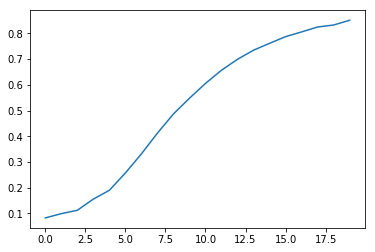

In [82]:
plt.plot(history.history['acc'])

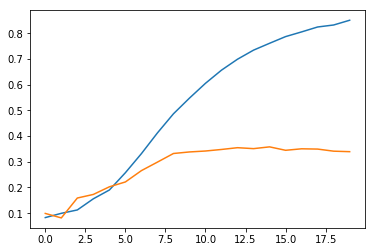

In [83]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

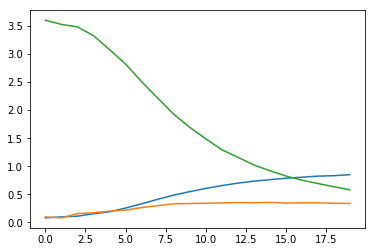

In [84]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [85]:
score = model.evaluate(test_X, test_y)
print(score)

4649/4649 [==============================] - 1s 199us/step
[2.9548893590259615, 0.3394278339620148]
